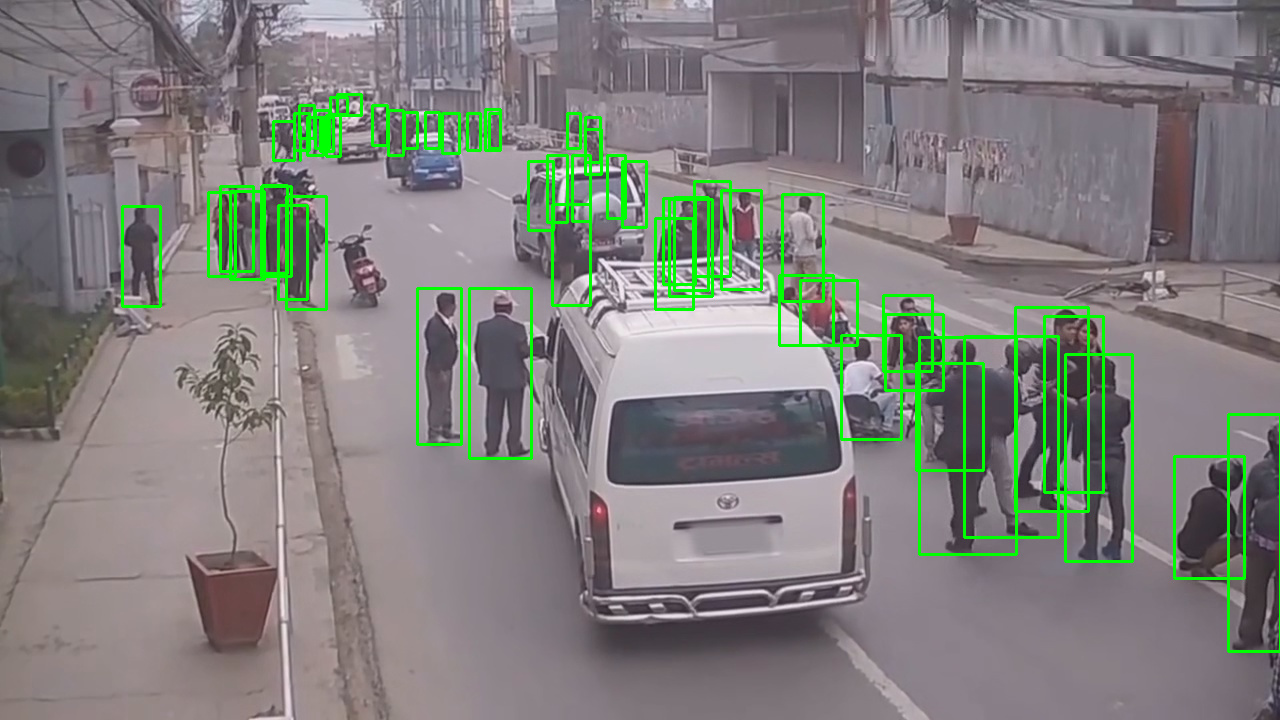

In [33]:
### ‰ª•‰∏ã‰ª£Á†ÅÁî®‰∫éÊ£ÄÈ™åÊï∞ÊçÆÈõÜÊòØÂê¶Á¨¶ÂêàYOLOÁöÑÊ†áÊ≥®Ê†áÂáÜÔºåÂ∞ÜbbxÂú®ÂõæÁâá‰∏≠Ê°ÜÈÄâÂá∫Êù•


import cv2
from PIL import Image

# ËØªÂèñÂõæÂÉè
image_path = "/mnt/disk4/czf/yolov8_dataset/train/images/5_1585.jpg"
image = cv2.imread(image_path)

# ËØªÂèñYOLOÊ†áÁ≠æÊñá‰ª∂
label_path = image_path.replace('images','labels').replace('.jpg','.txt')
# label_path = "/mnt/disk4/czf/MOT17_dataset/train/labels/MOT17-02-FRCNN_000001.txt"

# Ëß£ÊûêÊ†áÁ≠æÊñá‰ª∂
with open(label_path, 'r') as file:
    lines = file.readlines()

# Âæ™ÁéØÂ§ÑÁêÜÊØè‰∏™ÂØπË±°ÁöÑÊ†áÁ≠æ
for line in lines:
    line = line.strip().split()  # ÂàÜÂâ≤Ê†áÁ≠æÂ≠óÊÆµ
    class_id, x_center, y_center, width, height = map(float, line)

    # ËÆ°ÁÆóËæπÁïåÊ°ÜÁöÑÂùêÊ†áÔºà‰ª•ÂÉèÁ¥†‰∏∫Âçï‰ΩçÔºâ
    img_height, img_width, _ = image.shape
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    # ÁªòÂà∂ËæπÁïåÊ°Ü
    color = (0, 255, 0)  # Ê°ÜÁöÑÈ¢úËâ≤ÔºàÁªøËâ≤Ôºâ
    thickness = 2  # Ê°ÜÁöÑÁ∫øÊù°ÂÆΩÂ∫¶
    cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)

im=Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
im.show()


In [ ]:
import os

# ÂÆö‰πâÂåÖÂê´jpgÊñá‰ª∂ÁöÑÊñá‰ª∂Â§πË∑ØÂæÑ
jpg_folder = '/mnt/disk4/czf/HiEve_dataset/train/images'

# ÂÆö‰πâÂåÖÂê´txtÊñá‰ª∂ÁöÑÊñá‰ª∂Â§πË∑ØÂæÑ
txt_folder = '/mnt/disk4/czf/HiEve_dataset/train/labels'

# Ëé∑ÂèñjpgÊñá‰ª∂Â§π‰∏≠ÁöÑÊâÄÊúâÊñá‰ª∂Âêç
jpg_files = os.listdir(jpg_folder)

# ÈÅçÂéÜjpgÊñá‰ª∂Â§π‰∏≠ÁöÑÊØè‰∏™jpgÊñá‰ª∂
for jpg_file in jpg_files:
    # ÊûÑÂª∫ÂØπÂ∫îÁöÑtxtÊñá‰ª∂Ë∑ØÂæÑ
    txt_file = os.path.join(txt_folder, jpg_file.replace('.jpg', '.txt'))
    
    # Ê£ÄÊü•txtÊñá‰ª∂ÊòØÂê¶Â≠òÂú®
    if not os.path.exists(txt_file):
        print(f"ÂØπ‰∫é {jpg_file},‰∏çÂ≠òÂú®ÂØπÂ∫îÁöÑtxtÊñá‰ª∂")


In [ ]:
from ultralytics import YOLO

model = YOLO('weights/yolov8n.pt')  # Âä†ËΩΩÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºàÂª∫ËÆÆÁî®‰∫éËÆ≠ÁªÉÔºâ

# ‰ΩøÁî®Ê®°Âûã
model.train(data="mydata.yaml", epochs=1,batch=32)  # ËÆ≠ÁªÉÊ®°Âûã
model.predict(source='/mnt/disk4/czf/CrowdHuman_dataset/train/images/273271,1017c000ac1360b7.jpg',save=True)


In [2]:
from ultralytics import YOLO

model = YOLO('/home/chenzhuofan/yolov8/runs/detect/train3/weights/best.pt')  # Âä†ËΩΩÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºàÂª∫ËÆÆÁî®‰∫éËÆ≠ÁªÉÔºâ
metrics = model.val()

Ultralytics YOLOv8.0.180 üöÄ Python-3.8.18 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11178MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients
val: Scanning /mnt/disk4/czf/yolov8_dataset/test/labels... 8972 images, 51 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8972/8972 [00:13<00:00, 650.23it/s]
val: WARNING ‚ö†Ô∏è /mnt/disk4/czf/yolov8_dataset/test/images/5_0768.jpg: 1 duplicate labels removed
val: WARNING ‚ö†Ô∏è /mnt/disk4/czf/yolov8_dataset/test/images/5_0770.jpg: 1 duplicate labels removed
val: New cache created: /mnt/disk4/czf/yolov8_dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 561/561 [03:41<00:00,  2.53it/s]
                   all       8972     244860      0.971       0.91      0.961      0.842
Speed: 0.2ms preprocess, 16.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val2


In [ ]:
# oding = utf-8
# -*- coding:utf-8 -*-
import os
import random

trainval_percent = 0.1
train_percent = 0.9
xmlfilepath = '/mnt/disk4/czf/yolox_dataset/Annotations'
total_xml = os.listdir(xmlfilepath)

num = len(total_xml)
list = range(num)
tv = int(num * trainval_percent)
trainval = random.sample(list, tv)

ftest = open('/mnt/disk4/czf/yolox_dataset/ImageSets/Main/test.txt', 'w')
ftrain = open('/mnt/disk4/czf/yolox_dataset/ImageSets/Main/trainval.txt', 'w')

for i in list:
    name = total_xml[i][:-4] + '\n'
    if i in trainval:
        ftest.write(name)
    else:
        ftrain.write(name)

ftrain.close()
ftest.close()



